In [113]:
from datetime import date
import requests
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

In [114]:
sns.set_theme(style="white")

for font in font_manager.findSystemFonts("fonts/Manrope"):
    font_manager.fontManager.addfont(font)
plt.rc("font", family="Manrope", size=14)
plt.rc("xtick", labelsize="medium")
plt.rc("ytick", labelsize="medium")
plt.rc(
    "axes",
    titlesize="large",
    titlelocation="left",
    titlepad=10,
    labelsize="large",
)
plt.rc("axes.spines", top=False, right=False, bottom=True, left=True)
plt.rc("figure", titlesize="x-large", titleweight="extra bold")
plt.rc("figure.constrained_layout", use=True)
plt.rc("legend", fontsize="medium", title_fontsize="large", frameon=False)

In [115]:
OURA_ACCESS_TOKEN = dotenv_values()["OURA_ACCESS_TOKEN"]

In [116]:
OURA_API_URL = "https://api.ouraring.com/v2/usercollection/{endpoint}"

In [117]:
url = OURA_API_URL.format(endpoint="daily_readiness")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [118]:
daily_readiness = pd.json_normalize(response.json()["data"])
daily_readiness.set_index("id", inplace=True)
daily_readiness["day"] = pd.to_datetime(
    daily_readiness["day"]).dt.to_period("D")
daily_readiness["timestamp"] = pd.to_datetime(
    daily_readiness["timestamp"], utc=True)
daily_readiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 9accdec6-a27e-43c1-afe2-32f66ab65e6a to a91c7cc6-aca5-40c7-93c6-a27f3bda1628
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   day                                 133 non-null    period[D]          
 1   score                               133 non-null    int64              
 2   temperature_deviation               132 non-null    float64            
 3   temperature_trend_deviation         131 non-null    float64            
 4   timestamp                           133 non-null    datetime64[ns, UTC]
 5   contributors.activity_balance       122 non-null    float64            
 6   contributors.body_temperature       132 non-null    float64            
 7   contributors.hrv_balance            127 non-null    float64            
 8   contributors.previous_day_activity  122 non-null    float

In [119]:
url = OURA_API_URL.format(endpoint="daily_sleep")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [120]:
daily_sleep = pd.json_normalize(response.json()["data"])
daily_sleep.set_index("id", inplace=True)
daily_sleep["day"] = pd.to_datetime(daily_sleep["day"]).dt.to_period("D")
daily_sleep["timestamp"] = pd.to_datetime(daily_sleep["timestamp"], utc=True)
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 88473e7b-abeb-4901-af7d-6e93b2ecc40e to bfbd9a72-5793-4940-927d-2999cd7478bf
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   day                       133 non-null    period[D]          
 1   score                     133 non-null    int64              
 2   timestamp                 133 non-null    datetime64[ns, UTC]
 3   contributors.deep_sleep   133 non-null    int64              
 4   contributors.efficiency   133 non-null    int64              
 5   contributors.latency      133 non-null    int64              
 6   contributors.rem_sleep    133 non-null    int64              
 7   contributors.restfulness  133 non-null    int64              
 8   contributors.timing       133 non-null    int64              
 9   contributors.total_sleep  133 non-null    int64              
dtypes: datetime64[ns, UTC](

In [121]:
url = OURA_API_URL.format(endpoint="daily_activity")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [122]:
daily_activity = pd.json_normalize(response.json()["data"])
daily_activity.set_index("id", inplace=True)
daily_activity["day"] = pd.to_datetime(daily_activity["day"]).dt.to_period("D")
daily_activity["timestamp"] = pd.to_datetime(
    daily_activity["timestamp"], utc=True)
samples_columns = ["class_5_min", "met.interval", "met.items", "met.timestamp"]
daily_activity["met.timestamp"] = pd.to_datetime(
    daily_activity["met.timestamp"], utc=True
)
daily_activity_samples = daily_activity[samples_columns].copy()
daily_activity.drop(columns=samples_columns, inplace=True)
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 6950c724-9f7f-4784-8b66-8343970a12ef to cf3c7237-eed7-47cd-acd1-dde1dd7ee1ff
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   score                            138 non-null    int64              
 1   active_calories                  138 non-null    int64              
 2   average_met_minutes              138 non-null    float64            
 3   equivalent_walking_distance      138 non-null    int64              
 4   high_activity_met_minutes        138 non-null    int64              
 5   high_activity_time               138 non-null    int64              
 6   inactivity_alerts                138 non-null    int64              
 7   low_activity_met_minutes         138 non-null    int64              
 8   low_activity_time                138 non-null    int64              
 9   medium_activi

In [123]:
url = OURA_API_URL.format(endpoint="sleep")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [124]:
sleep = pd.json_normalize(response.json()["data"])
sleep.set_index("id", inplace=True)
sleep["day"] = pd.to_datetime(sleep["day"]).dt.to_period("D")
sleep["bedtime_start"] = pd.to_datetime(sleep["bedtime_start"], utc=True)
sleep["bedtime_end"] = pd.to_datetime(sleep["bedtime_end"], utc=True)
sleep["hrv.timestamp"] = pd.to_datetime(sleep["hrv.timestamp"], utc=True)
sleep["heart_rate.timestamp"] = pd.to_datetime(sleep["heart_rate.timestamp"], utc=True)
samples_columns = [
    "movement_30_sec",
    "sleep_phase_5_min",
    "hrv.timestamp",
    "hrv.interval",
    "hrv.items",
    "heart_rate.timestamp",
    "heart_rate.interval",
    "heart_rate.items",
]
sleep_samples = sleep[samples_columns].copy()
sleep.drop(columns=samples_columns + ["hrv", "heart_rate"], inplace=True)
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 60de1520-a18a-46f5-91c0-3e176586eb75 to 38511525-324c-4fac-a1be-422c38c051a7
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype              
---  ------                                        --------------  -----              
 0   average_breath                                160 non-null    float64            
 1   average_heart_rate                            160 non-null    float64            
 2   average_hrv                                   138 non-null    float64            
 3   awake_time                                    160 non-null    int64              
 4   bedtime_end                                   160 non-null    datetime64[ns, UTC]
 5   bedtime_start                                 160 non-null    datetime64[ns, UTC]
 6   day                                           160 non-null    period[D]          
 7   deep_sleep_duration                         

Text(0.054828499999999995, 0.98, 'Readiness, Sleep and Activity Scores')

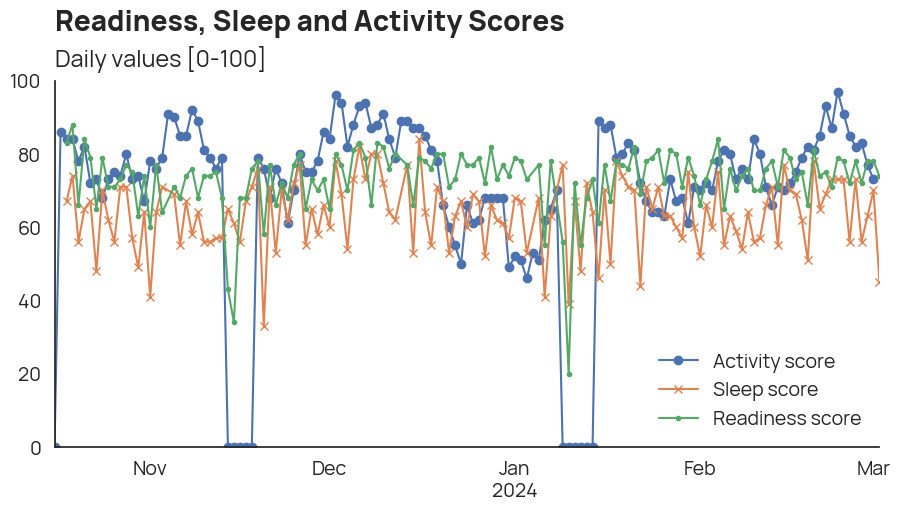

In [125]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_activity.plot(x="day", y="score", marker="o",
                    ax=ax, label="Activity score")
daily_sleep.plot(x="day", y="score", marker="x", ax=ax, label="Sleep score")
daily_readiness.plot(x="day", y="score", marker=".",
                     ax=ax, label="Readiness score")
ax.set_xlabel("")
ax.set_title("Daily values [0-100]", loc="left", size="large")
ax.set_ylim(0, 100)
fig.canvas.draw()
fig.suptitle(
    "Readiness, Sleep and Activity Scores",
    x=ax.get_position().x0,
    ha="left",
)

In [126]:
daily_readiness["score_7DMA"] = daily_readiness.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()
daily_sleep["score_7DMA"] = daily_sleep.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()
daily_activity["score_7DMA"] = daily_activity.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()

Text(0.054828499999999995, 0.98, 'Readiness, Sleep and Activity Scores')

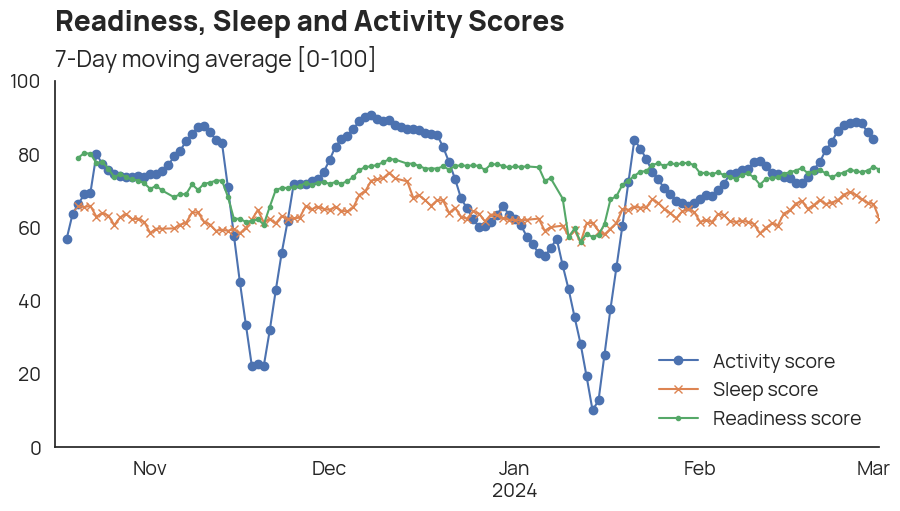

In [127]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_activity.plot(x="day", y="score_7DMA", marker="o",
                    ax=ax, label="Activity score")
daily_sleep.plot(x="day", y="score_7DMA", marker="x",
                 ax=ax, label="Sleep score")
daily_readiness.plot(
    x="day", y="score_7DMA", marker=".", ax=ax, label="Readiness score"
)
ax.set_xlabel("")
ax.set_title("7-Day moving average [0-100]", loc="left", size="large")
ax.set_ylim(0, 100)
fig.canvas.draw()
fig.suptitle(
    "Readiness, Sleep and Activity Scores",
    x=ax.get_position().x0,
    ha="left",
)